<img src="logo.jpg" />

## [Pedram Jahangiry](https://github.com/PJalgotrader) 

# Polynomial Regression

Polynomial regression extends the linear model by adding extra predictors, obtainded by raising each of the original predictors to a power. This approach provides a simple way to provide a **non-linear fit** to data. The model however is still **linear**. 

First we need to import the libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


sns.set()  #if you want to use seaborn themes with matplotlib functions

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Why Polynomial Regression? 

Let's generate some random data set based on true model f(x)

$$y =f(x)= x + 2x^2- 3 x^3 + \epsilon$$

In [3]:
np.random.randn(5)

array([ 0.91976683,  0.67504241, -0.53467226, -1.31076363, -0.07505218])

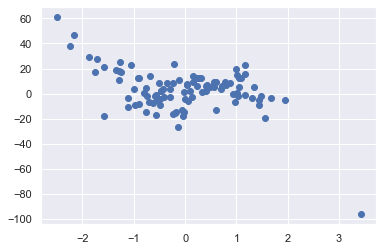

In [4]:
np.random.seed(102)
x = np.random.randn(100)
y = x + 2 * (x ** 2) -3 * (x ** 3) + 5*np.random.normal(0,2,100)
plt.scatter(x,y)
plt.show()

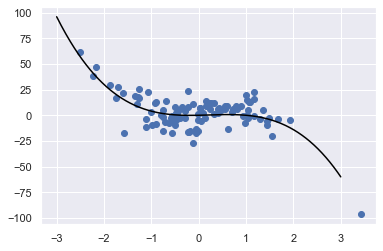

In [5]:
plt.scatter(x,y)
# let's add the unobservable true model
w=np.linspace(-3,3,500)
z= w+ 2*(w**2) - 3*(w**3)
plt.plot(w,z, c='black')
plt.show()

###  Polynomial transformation of the data

In [6]:
poly = PolynomialFeatures(degree =5)

In [7]:
x

array([ 1.6680683 ,  0.92586182,  1.05799677, -0.92033901,  1.29974847,
        0.33118301, -0.50984497, -0.90309892, -0.13001637, -2.23820349,
        0.97316488, -0.02418481, -0.48492775, -1.10926436, -0.55897476,
        1.04238657, -1.71226271,  0.13611989, -0.46444399,  0.05097984,
        1.44789871,  0.59313848, -0.75561568, -0.62716553,  0.88403489,
        0.16271776, -2.50281287,  0.41079099,  0.72875041,  0.0291402 ,
       -0.29105246,  0.31429308,  0.99718968,  3.42856293, -0.57856735,
       -0.20416301, -1.86716866,  1.44343395,  0.40338004, -0.6907654 ,
        1.17228746, -1.5711284 ,  0.80199231, -0.57197286,  1.55339371,
        0.70121998,  1.01499268, -0.11804196, -1.06389095,  1.1766912 ,
        1.34761944, -0.79430004, -1.27994303,  0.55675276, -0.04840372,
        0.23436431, -0.98365709,  1.09300506, -1.25129603,  1.48159981,
       -0.22729307, -0.06378016, -0.17618511, -2.17267394, -1.58895723,
       -1.29298148, -0.5474315 , -0.0087966 , -0.47854023, -0.35

In [8]:
type(x)
x[0:5]

array([ 1.6680683 ,  0.92586182,  1.05799677, -0.92033901,  1.29974847])

In [9]:
x.reshape(-1,1) [0:5]
# this is equivalent to x.reshape(100,1)[0:5]

array([[ 1.6680683 ],
       [ 0.92586182],
       [ 1.05799677],
       [-0.92033901],
       [ 1.29974847]])

In [10]:
X_poly= pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))
X_poly.head()

,0,1,2,3,4,5
0,1.0,1.668068,2.782452,4.641320,7.742038,12.914249
1,1.0,0.925862,0.857220,0.793667,0.734826,0.680348
2,1.0,1.057997,1.119357,1.184276,1.252960,1.325628
3,1.0,-0.920339,0.847024,-0.779549,0.717449,-0.660297
4,1.0,1.299748,1.689346,2.195725,2.853890,3.709339


###  Splitting the data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=100)

In [12]:
X_train.head()

,0,1,2,3,4,5
32,1.0,0.997190,0.994387,0.991593,0.988806,0.986027
6,1.0,-0.509845,0.259942,-0.132530,0.067570,-0.034450
3,1.0,-0.920339,0.847024,-0.779549,0.717449,-0.660297
12,1.0,-0.484928,0.235155,-0.114033,0.055298,-0.026815
51,1.0,-0.794300,0.630913,-0.501134,0.398051,-0.316172


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_hat_te = model.predict(X_test)

In [15]:
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_test':y_hat_te, 'resid': y_test - y_hat_te})
df_predictions.head()

,y_test,y_hat_test,resid
0,-5.403786,-0.004184,-5.399601
1,-14.957215,-1.701846,-13.255370
2,61.375324,35.333017,26.042307
3,-17.744152,22.460100,-40.204251
4,-15.849248,-1.877517,-13.971731


### Plotting the train data regression function

In [16]:
y_hat_tr = model.predict(X_train)
type(y_hat_tr)

numpy.ndarray

In [17]:
np.c_[X_train[1],y_hat_tr][:5]

array([[ 0.99718968,  5.49656101],
       [-0.50984497, -2.42204352],
       [-0.92033901,  2.1857189 ],
       [-0.48492775, -2.48838418],
       [-0.79430004,  0.03056342]])

In [18]:
prediction_tr =pd.DataFrame(np.c_[X_train[1],y_hat_tr], columns=['x','y_hat_tr'])
prediction_tr.head()

,x,y_hat_tr
0,0.997190,5.496561
1,-0.509845,-2.422044
2,-0.920339,2.185719
3,-0.484928,-2.488384
4,-0.794300,0.030563


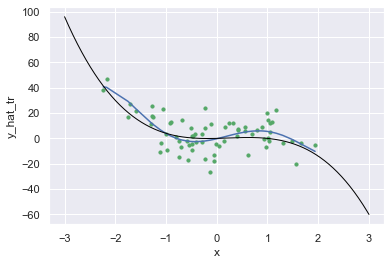

In [19]:
# plotting the fitted line vs true (unobservable) line.
sns.lineplot(x='x',y='y_hat_tr', data=prediction_tr)
plt.scatter(X_train[1], y_train, s=10, c='g')
plt.plot(w,z, c='black', linewidth=1)

plt.show()

###  comparing the MSE_train and MSE_test

In [20]:
err_tr = y_train - y_hat_tr
MSE_train = np.mean(np.square(err_tr))
round(MSE_train,2)

98.84

In [21]:
err_te= y_test - y_hat_te
MSE_test = np.mean(np.square(err_te))
round(MSE_test,2)

1987.51

### All in one function

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split




def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=100):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)


  
#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))
    
    return poly_degree, RMSE_train, RMSE_test

    


In [23]:
my_polynomial_regression(poly_degree=5,X=x,y=y)

(5, 9.94, 44.58)

In [24]:
my_polynomial_regression(poly_degree=1, X=x, y=y)

(1, 12.65, 20.74)

In [25]:
returns= []
for i in range(1,6):
    returns.append(my_polynomial_regression(poly_degree=i, X=x,y=y))
    
output = pd.DataFrame(returns, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,12.65,20.74
1,2,11.32,29.15
2,3,10.24,10.20
3,4,10.06,33.45
4,5,9.94,44.58


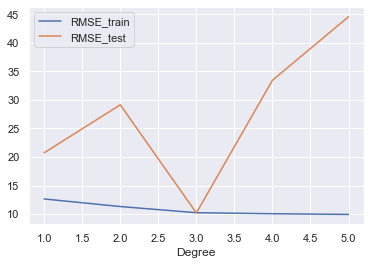

In [26]:
output.set_index('Degree').plot()
plt.show()

by looking at the table and graph above, what is the optimal poly degree?

But what if we don't have the labeled test set? we will estimate it by **cross validation**. 

### Challenge: 
Can you generate the same table all in one line of code? 

In [27]:
pd.DataFrame([my_polynomial_regression(i,x,y) for i in range(1,6)], columns=['Degree', 'RMSE_train', 'RMSE_test'])

,Degree,RMSE_train,RMSE_test
0,1,12.65,20.74
1,2,11.32,29.15
2,3,10.24,10.20
3,4,10.06,33.45
4,5,9.94,44.58


##  Finding the optimal polynomial degree : Elbow method

### Cross validation 

In [28]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [29]:
model = LinearRegression()

In [30]:
# recall our d=5 so far! 
X_train.head()

,0,1,2,3,4,5
32,1.0,0.997190,0.994387,0.991593,0.988806,0.986027
6,1.0,-0.509845,0.259942,-0.132530,0.067570,-0.034450
3,1.0,-0.920339,0.847024,-0.779549,0.717449,-0.660297
12,1.0,-0.484928,0.235155,-0.114033,0.055298,-0.026815
51,1.0,-0.794300,0.630913,-0.501134,0.398051,-0.316172


In [31]:
NMSE = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )
# cv is the number of Folds. To speed up the process you can set the n_jobs=-1
# to see the list of valid scorings try:sorted(sklearn.metrics.SCORERS.keys())

### Exercise: 
Why do you think the scoring is "negative MSE" instead of "MSE"?

In [32]:
NMSE

array([-110.21236405,  -94.26943861, -454.20321642, -156.387272  ,
        -84.96548085, -234.76610844,  -92.31163064,  -44.37653192,
        -55.46621079, -178.73365102])

In [33]:
MSE_CV= np.mean(-NMSE)
MSE_CV

150.5691904754522

In [34]:
RMSE_CV = np.sqrt(-NMSE).mean()
RMSE_CV

11.565089766333518

### Exercise: Plot the test MSE using 5-fold cross validation.

In [35]:
# Fil in the blanks!

RMSE_CV=[]
iterator= range(1,8) # the second number is polynomial degree 
for i in iterator:
    X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(degree=i).fit_transform(x.reshape(-1,1)), y, test_size=0.3, random_state=100)
    MSE = -cross_val_score(estimator = LinearRegression() , X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame({'Poly degree':iterator, 'RMSE_CV':RMSE_CV })
output

,Poly degree,RMSE_CV
0,1,13.312919
1,2,12.571895
2,3,10.864611
3,4,11.489488
4,5,10.532328
5,6,10.554299
6,7,14.307515


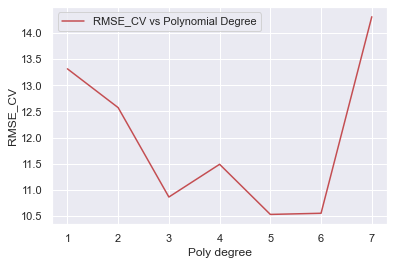

In [36]:
sns.lineplot(x='Poly degree', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs Polynomial Degree")
plt.show()

now using RMSE_CV and elbo method, what is the optimal poly degree? 

###  Additional links:
1- Underfitting vs Overfitting: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

2- Going beyond linearity in python: https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/

3- Validation set approach: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab7-py.html
4- How to concat data frames: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html